# Emotion detection using CNN 
## A) Creating the model

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
import h5py
import matplotlib.pyplot as plt 

#### 1) Link for loading the database

##### 1.1) For Romain :

In [5]:
emotion_data = pd.read_csv('/Users/romai/Documents/Ecole/Ingé - M1_auto/Q2/Système intelligent/fer2013.csv')
print(emotion_data)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


##### 1.2) For Lucas :

In [ ]:
emotion_data = pd.read_csv('/Users/Lucas/Documents/Ingenieur_Industriel/Master_1/Q2/Systèmes_intelligents/fer2013.csv')
print(emotion_data)

#### 2) Reading the data

In [6]:
emotion_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
emotion_data.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [8]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


#### 3) Formation of matrices

In [9]:
# Premièrement, création sous forme de List
X_train = []
y_train = []
X_test = []
y_test = []

# Pour chaque ligne de la base de donnée, si il s'agit d'un "Training" les données vont être attribuées
# à X_train et l'émotion correspondante à y_train
# Si il s'agit d'un "Public test", les données vont être attribuées à X_test et l'émotion correspondante
# à y_test
for index, row in emotion_data.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k,'float32'))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(np.array(k,'float32'))
        y_test.append(row['emotion'])

In [10]:
# Transformation du list en array et du type des données en float32
X_train = np.array(X_train,'float32')
y_train = np.array(y_train,'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

# Convertion du vecteur de classe (entiers) en une matrice de classe binaire.
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

#### 4) Normalization of data between 0 and 1

In [11]:
# Transformation des éléments des matrices en un nombre entre 0 et 1 pour faciliter l'apprentissage
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

# Remodulation de X_train et X_test en image de 48x48 pixels
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

# Visualisation de la forme des matrices
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)
print('X_test  : ',X_test.shape)
print('y_test  : ',y_test.shape)

X_train :  (28709, 48, 48, 1)
y_train :  (28709, 7)
X_test  :  (3589, 48, 48, 1)
y_test  :  (3589, 7)


#### 5) Creating the model

##### 5.1) Designing the CNN

In [9]:
# Creation d'un model lineaire de piles de couches
model = Sequential()

# 1nst convolution layer
model.add(Convolution2D(64,kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Convolution2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.5))

# 2nd convolution layer
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(Dropout(0.5))

# 3nd convolution layer
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

# Passage en matrice à 1D
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

# Probabilité des classes
model.add(Dense(7, activation='softmax'))

# Affichage du sommaire du model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0

##### 5.2) Model training

In [10]:
# Configuration des pertes et métriques du model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
# Entrainement du model
history = model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, validation_data = (X_test, y_test), shuffle=True)

Epoch 1/30
898/898 [==============================] - 333s 370ms/step - loss: 1.8431 - accuracy: 0.2395 - val_loss: 1.8080 - val_accuracy: 0.2494
Epoch 2/30
898/898 [==============================] - 365s 406ms/step - loss: 1.7848 - accuracy: 0.2568 - val_loss: 1.8012 - val_accuracy: 0.2497
Epoch 3/30
898/898 [==============================] - 424s 472ms/step - loss: 1.7676 - accuracy: 0.2634 - val_loss: 1.7788 - val_accuracy: 0.2577
Epoch 4/30
898/898 [==============================] - 406s 452ms/step - loss: 1.7492 - accuracy: 0.2856 - val_loss: 1.7225 - val_accuracy: 0.3070
Epoch 5/30
898/898 [==============================] - 330s 368ms/step - loss: 1.7017 - accuracy: 0.3122 - val_loss: 1.6622 - val_accuracy: 0.3335
Epoch 6/30
898/898 [==============================] - 329s 367ms/step - loss: 1.6582 - accuracy: 0.3377 - val_loss: 1.6457 - val_accuracy: 0.3391
Epoch 7/30
898/898 [==============================] - 324s 361ms/step - loss: 1.6292 - accuracy: 0.3547 - val_loss: 1.6088 -

In [12]:
loss_and_metrics = model.evaluate(X_test,y_test)
print(loss_and_metrics)

113/113 [==============================] - 9s 80ms/step - loss: 1.1944 - accuracy: 0.5536
[1.19441819190979, 0.5536361336708069]


##### 5.3) Save model with h5py

In [13]:
model.save('model_emotion_detection_30epochs.h5')

#### 6) Results

##### 6.1) Graphing our training and validation

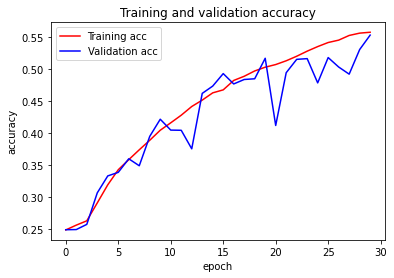

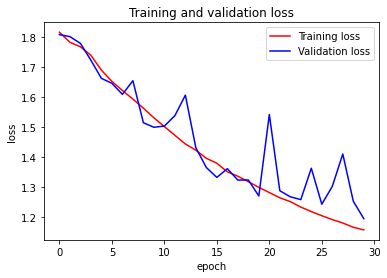

In [14]:
#Training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()

#Training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

##### 6.2) Confusion matrix

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
preds = np.round(model.predict(X_test),0)
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
classification_metrics = metrics.classification_report(y_test, preds, target_names=emotions)
print (classification_metrics)

              precision    recall  f1-score   support

       Angry       0.57      0.30      0.40       467
     Disgust       0.86      0.11      0.19        56
        Fear       0.64      0.09      0.16       496
       Happy       0.91      0.62      0.74       895
         Sad       0.50      0.24      0.33       653
    Surprise       0.83      0.66      0.73       415
     Neutral       0.70      0.21      0.32       607

   micro avg       0.74      0.36      0.49      3589
   macro avg       0.72      0.32      0.41      3589
weighted avg       0.71      0.36      0.46      3589
 samples avg       0.36      0.36      0.36      3589



C:\Users\romai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it’s categorical variable
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
 
#Add Normalization Option prints pretty confusion metric with normalization option ‘’’
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
    else:
      print('Confusion matrix, without normalization')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Normalized confusion matrix


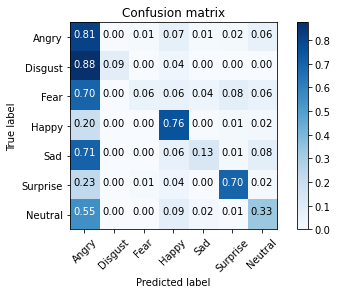

In [89]:
plot_confusion_matrix(confusion_matrix, ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], normalize=True)